In [15]:
!pip install mysql-connector-python

In [16]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(
        host='localhost',
        database='mbta_2.0',
        user='root',
        password='Ruju*0901',
        auth_plugin='mysql_native_password'
    )

    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)

        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to database: ", record)

        sql_select_Query1 = "SELECT r.Route_ID, AVG(s.Delay) AS Average_Delay FROM schedules s INNER JOIN route r ON s.Route_ID = r.Route_ID GROUP BY r.Route_ID;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query1)
        record1 = cursor.fetchall()

        sql_select_Query2 = "SELECT s.Station_Name, COUNT(DISTINCT rs.Route_ID) AS Num_Routes FROM stations s LEFT JOIN routestops rs ON s.Station_ID = rs.Station_ID GROUP BY s.Station_Name;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query2)
        record2 = cursor.fetchall()

        sql_select_Query3 = "SELECT t.Traveler_Type, COUNT(*) AS Num_Travelers FROM travelers t GROUP BY t.Traveler_Type;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query3)
        record3 = cursor.fetchall()

        sql_select_Query4 = "SELECT s.Station_Name, COUNT(DISTINCT sc.Schedule_ID) AS Train_Count FROM stations s INNER JOIN routestops rs ON s.Station_ID = rs.Station_ID INNER JOIN schedules sc ON rs.Route_ID = sc.Route_ID GROUP BY s.Station_Name;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query4)
        record4 = cursor.fetchall()

        sql_select_Query5 = "SELECT Traveler_ID, MAX(Max_Time_Spent) AS Max_Time_Spent FROM ( SELECT Traveler_ID, SUM(TIMESTAMPDIFF(MINUTE, TimeOfEntry, TimeOfExit)) AS Max_Time_Spent FROM travelers_trackinglogs GROUP BY Traveler_ID ) AS TravelerTimeSpent GROUP BY Traveler_ID;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query5)
        record5 = cursor.fetchall()

        sql_select_Query6 = "SELECT * FROM travelers_trackinglogs;"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query6)
        record6 = cursor.fetchall()

        
        
    print("QUERY:1\n")
    print("------------------------------------")
    print("Average Delay per Route:\n")
    print("------------------------------------")
    for row in record1:
        print('Route_ID:', row[0])
        print('Average_Delay:', row[1])
        print("\n")
        
    print("QUERY:2\n")
    print("------------------------------------")
    print("Number of Routes per Station:\n")
    print("------------------------------------")
    for row in record2:
        print('Station_Name:', row[0])
        print('Number_of_routes:', row[1])
        print("\n")
        
    print("QUERY:3\n")
    print("------------------------------------")
    print("Number of Travelers in Each Categoryn:\n")
    print("------------------------------------")
    for row in record3:
        print('Traveler_Type:', row[0])
        print('Count:', row[1])
        print("\n")

    print("QUERY:4\n")
    print("------------------------------------")
    print("Count of Trains Passing by Each Station:\n")
    print("------------------------------------")
    for row in record4:
        print('Station_Name:', row[0])
        print('Train_Count:', row[1])
        print("\n")
    print("QUERY:5\n")
    print("------------------------------------")
    print("Time Spend by tarveler:\n")
    print("------------------------------------")
    for row in record5:
        print('Traveler_ID:', row[0])
        print('Time_Spend:', row[1])
        print("\n")
    
    print("QUERY:6\n")
    print("------------------------------------")
    print("Tracking_ID Table:\n")
    print("------------------------------------")
    for row in record6:
        print('Tracking_ID:', row[0])
        print('Time_of_entry:', row[1])
        print('Time_of_exit:', row[2])
        print('Entry_Station_ID:', row[3])
        print('Exit_Station_ID:', row[4])
        print('Feedback_Category_ID:', row[5])
        print('Traveler_ID:', row[6])
        print("\n")
    
        
except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Connected to MySQL Server version  8.0.34
Your connected to database:  ('mbta_2.0',)
QUERY:1

------------------------------------
Average Delay per Route:

------------------------------------
Route_ID: 1
Average_Delay: 8.2692


Route_ID: 2
Average_Delay: 5.5600


Route_ID: 3
Average_Delay: 5.8800


Route_ID: 4
Average_Delay: 7.0400


QUERY:2

------------------------------------
Number of Routes per Station:

------------------------------------
Station_Name: Aquarium
Number_of_routes: 1


Station_Name: Arlington
Number_of_routes: 1


Station_Name: Black Bay
Number_of_routes: 1


Station_Name: Bolyston
Number_of_routes: 1


Station_Name: Broadway
Number_of_routes: 0


Station_Name: Charles: R
Number_of_routes: 1


Station_Name: Chinatown
Number_of_routes: 1


Station_Name: Community College
Number_of_routes: 1


Station_Name: Copley
Number_of_routes: 1


Station_Name: Downtown Crossing: YR
Number_of_routes: 2


Station_Name: Government Center: GB
Number_of_routes: 2


Station_Name: H

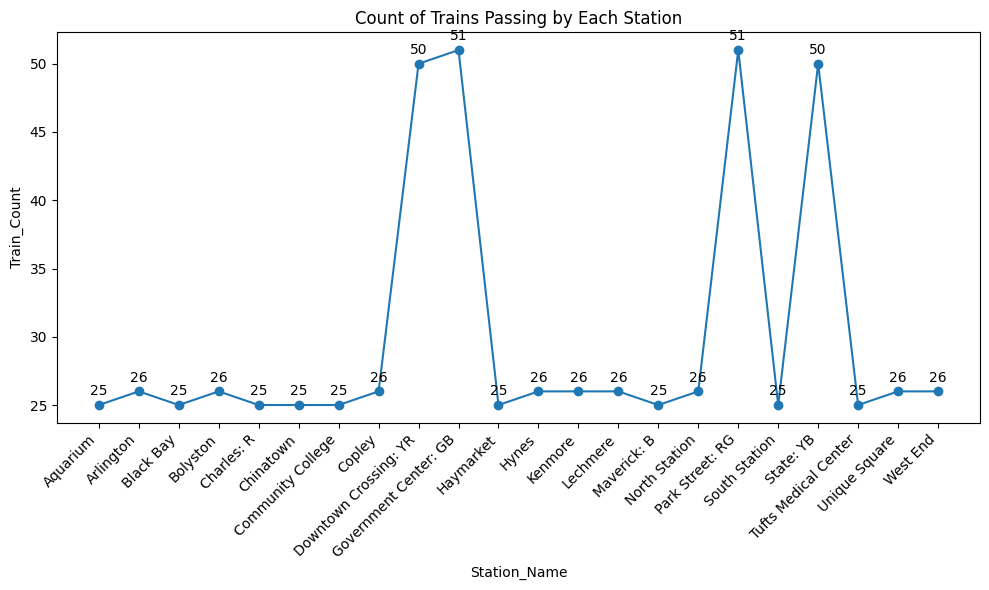

In [22]:
station_names = [row[0] for row in record4]
train_counts = [row[1] for row in record4]

plt.figure(figsize=(10, 6))
plt.plot(station_names, train_counts, marker='o', linestyle='-')
plt.xlabel('Station_Name')
plt.ylabel('Train_Count')
plt.title('Count of Trains Passing by Each Station')
plt.xticks(rotation=45, ha='right')  

for i, value in enumerate(train_counts):
    plt.text(station_names[i], value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

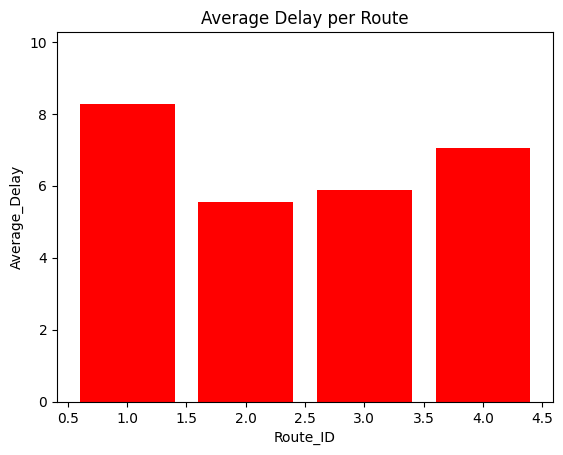

In [17]:
import matplotlib.pyplot as plt

route_ids = [row[0] for row in record1]
#average_delays = [row[1] for row in record1]

from decimal import Decimal

# Assuming average_delays is a list of floats or other numeric types
average_delays = [row[1] for row in record1]

# Convert each element to Decimal
average_delays_decimal = [Decimal(str(value)) for value in average_delays]

# Create bar chart
plt.bar(route_ids, average_delays_decimal, color='red')
plt.xlabel('Route_ID')
plt.ylabel('Average_Delay')
plt.title('Average Delay per Route')
plt.ylim(0, max(average_delays) + 2)  # Adjust ylim for better visualization



# Show the plot
plt.show()


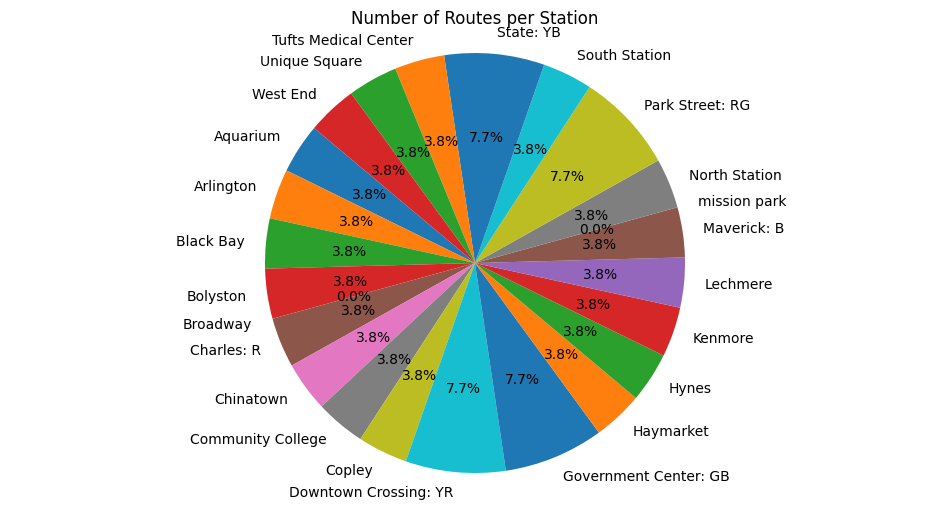

In [21]:
station_names=[row[0] for row in record2]
number_of_routes=[row[1] for row in record2]

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(number_of_routes, labels=station_names, autopct='%1.1f%%', startangle=140)
plt.title('Number of Routes per Station')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

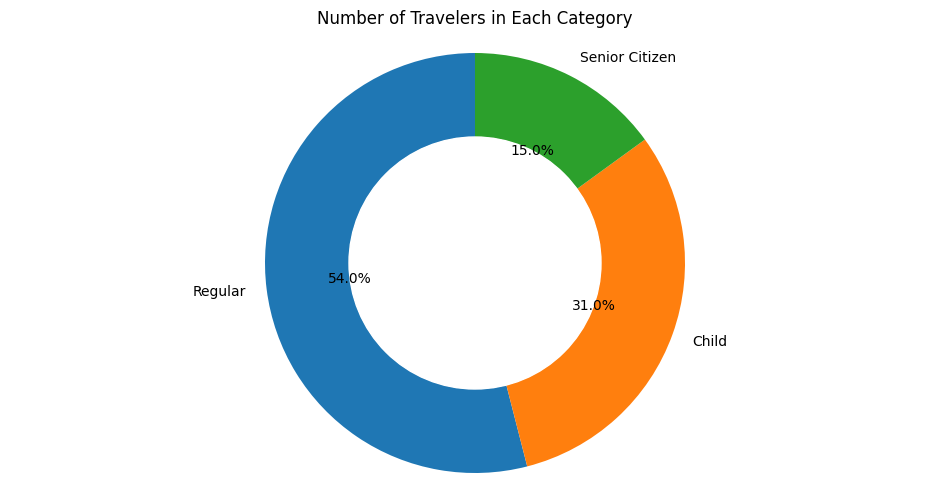

In [20]:
traveler_types = [row[0] for row in record3]
count_per_type = [row[1] for row in record3]

fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(count_per_type, labels=traveler_types, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
ax.set_title('Number of Travelers in Each Category')

center_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')

plt.show()

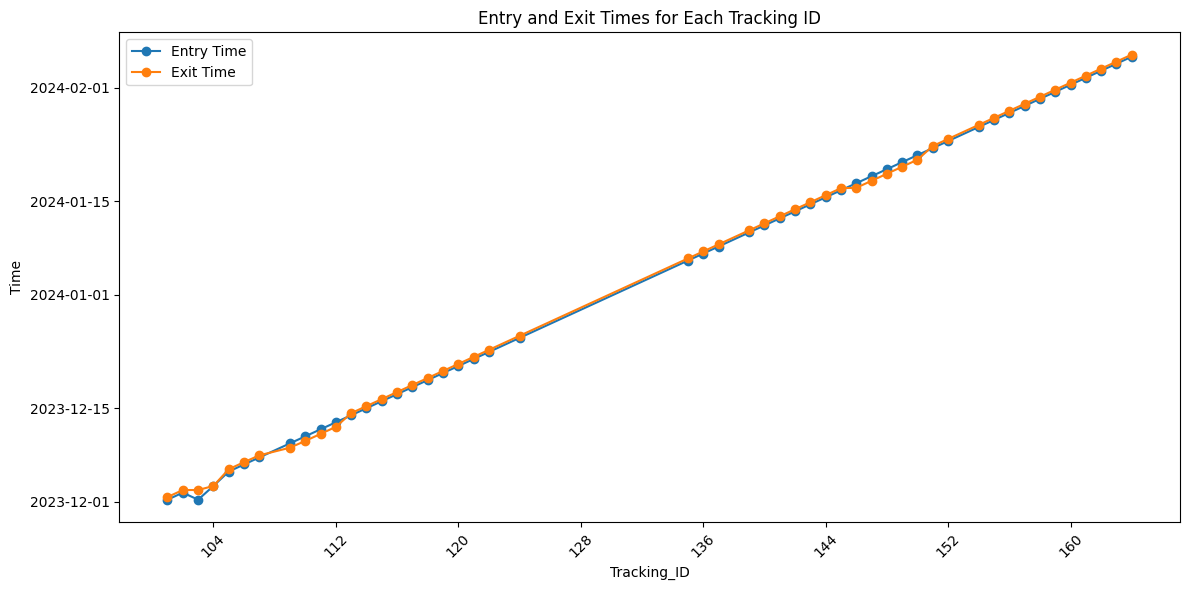

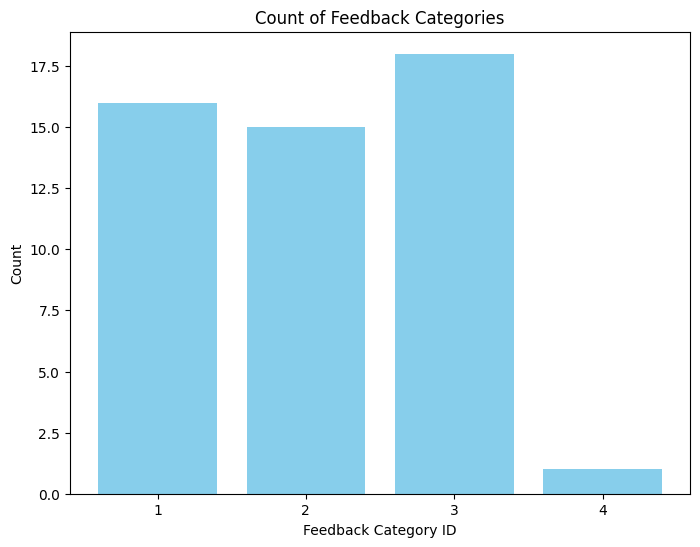

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Sample data (replace this with your actual data)
data = {
    'Tracking_ID': [row[0] for row in record6],
    'Time_of_entry':[row[1] for row in record6],
    'Time_of_exit': [row[2] for row in record6],
    'Entry_Station_ID': [row[3] for row in record6],
    'Exit_Station_ID': [row[4] for row in record6],
    'Feedback_Category_ID': [row[5] for row in record6],
    'Traveler_ID': [row[6] for row in record6]
}

df = pd.DataFrame(data)
df['Time_of_entry'] = pd.to_datetime(df['Time_of_entry'])
df['Time_of_exit'] = pd.to_datetime(df['Time_of_exit'])

# Visualization 1: Time Series Line Plot for Entry and Exit Times
plt.figure(figsize=(12, 6))
plt.plot(df['Tracking_ID'], df['Time_of_entry'], marker='o', label='Entry Time')
plt.plot(df['Tracking_ID'], df['Time_of_exit'], marker='o', label='Exit Time')
plt.xlabel('Tracking_ID')
plt.ylabel('Time')
plt.title('Entry and Exit Times for Each Tracking ID')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure integer x-axis ticks
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))  # Format x-axis ticks as integers
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Bar Chart for Count of Feedback Categories
feedback_counts = df['Feedback_Category_ID'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(feedback_counts.index, feedback_counts.values, color='skyblue')
plt.xlabel('Feedback Category ID')
plt.ylabel('Count')
plt.title('Count of Feedback Categories')
plt.xticks(feedback_counts.index)
plt.show()

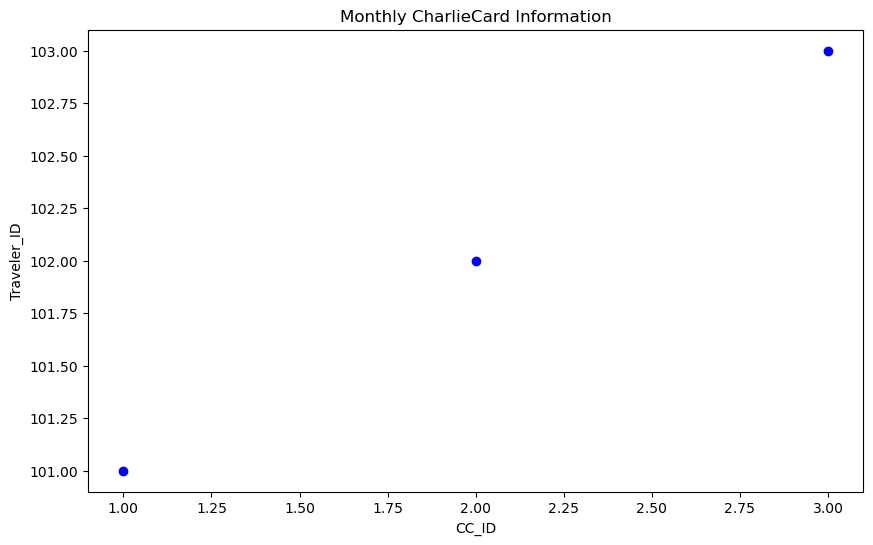

In [21]:
#qill work till here
import matplotlib.pyplot as plt

# Assuming 'records' is a list of tuples from your SQL query
records = [(1, 101, 'John'), (2, 102, 'Jane'), (3, 103, 'Bob')]

# Extract data for visualization
cc_ids = [row[0] for row in records]
traveler_ids = [row[1] for row in records]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cc_ids, traveler_ids, color='blue')
plt.xlabel('CC_ID')
plt.ylabel('Traveler_ID')
plt.title('Monthly CharlieCard Information')
plt.show()
